In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
caldf = fetch_california_housing()

In [7]:
print(caldf)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [9]:
df = pd.DataFrame(data=caldf.data,columns=caldf.feature_names)

In [13]:
df['target'] = caldf['target']

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df=df.sample(frac=0.25)

In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33,random_state=42)

In [38]:
X_test.shape,y_test.shape

((1703, 8), (1703,))

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
clf=DecisionTreeRegressor()

In [32]:
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred=clf.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

In [44]:
r2=r2_score(y_pred,y_test)
r2

0.4875567791985569

In [45]:
paramC = { 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'splitter':['best','random'],
         'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
         'max_features':['auto','sqrt','log2']         
        }

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.model_selection import GridSearchCV
gclf=GridSearchCV(clf,param_grid=paramC,cv=2,scoring='neg_mean_squared_error')

In [48]:
gclf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [49]:
y_pred=gclf.predict(X_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_pred,y_test)

0.4894604391129057

In [52]:
gclf.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [66]:
dclf = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=3, max_features='auto', splitter='best')

In [67]:
dclf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='auto')

In [68]:
from sklearn import tree


[Text(0.5, 0.875, 'x[0] <= 4.589\nfriedman_mse = 1.348\nsamples = 3457\nvalue = 2.097'),
 Text(0.25, 0.625, 'x[0] <= 2.684\nfriedman_mse = 0.825\nsamples = 2469\nvalue = 1.69'),
 Text(0.125, 0.375, 'x[2] <= 3.773\nfriedman_mse = 0.525\nsamples = 957\nvalue = 1.265'),
 Text(0.0625, 0.125, 'friedman_mse = 0.723\nsamples = 225\nvalue = 1.738'),
 Text(0.1875, 0.125, 'friedman_mse = 0.374\nsamples = 732\nvalue = 1.12'),
 Text(0.375, 0.375, 'x[5] <= 2.394\nfriedman_mse = 0.827\nsamples = 1512\nvalue = 1.96'),
 Text(0.3125, 0.125, 'friedman_mse = 1.26\nsamples = 420\nvalue = 2.574'),
 Text(0.4375, 0.125, 'friedman_mse = 0.46\nsamples = 1092\nvalue = 1.723'),
 Text(0.75, 0.625, 'x[0] <= 6.48\nfriedman_mse = 1.211\nsamples = 988\nvalue = 3.114'),
 Text(0.625, 0.375, 'x[5] <= 2.736\nfriedman_mse = 0.802\nsamples = 677\nvalue = 2.69'),
 Text(0.5625, 0.125, 'friedman_mse = 1.054\nsamples = 274\nvalue = 3.161'),
 Text(0.6875, 0.125, 'friedman_mse = 0.377\nsamples = 403\nvalue = 2.369'),
 Text(0.875

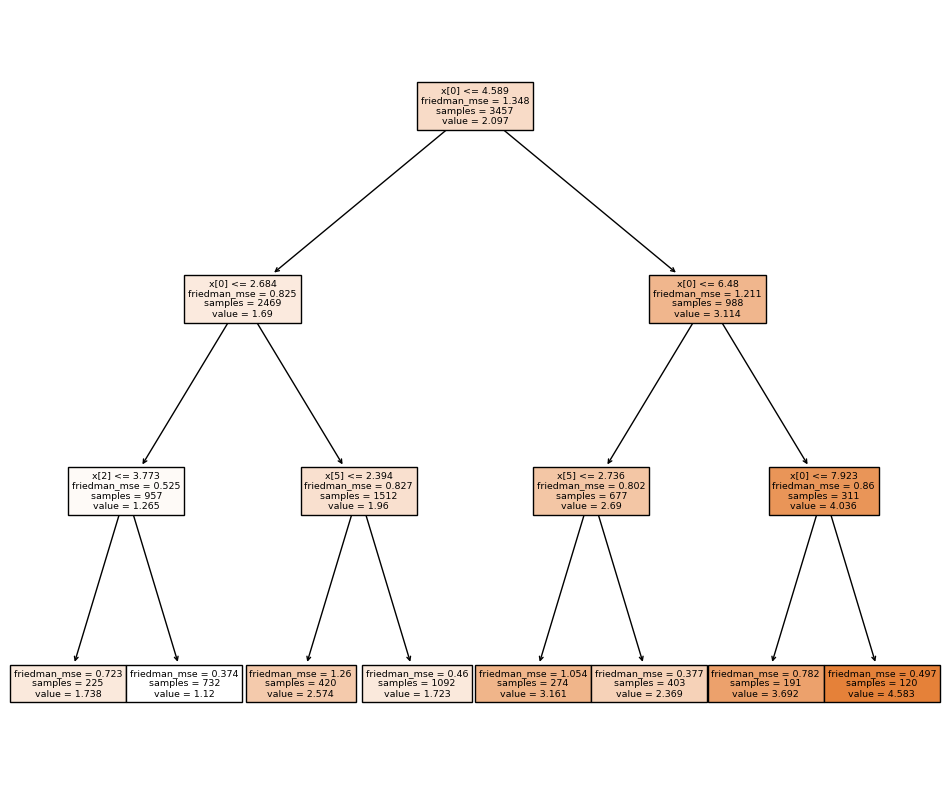

In [69]:
plt.figure(figsize=(12,10))
tree.plot_tree(dclf,filled=True)